<a href="https://colab.research.google.com/github/lubaochuan/ml_python/blob/main/HOML_NumPy_Pandas_guided_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Guided Lab: NumPy + Pandas Foundations

**You will practice:**
- Loading and exploring datasets (DataFrames + ndarrays)
- Selecting, filtering, sorting, and grouping data
- Handling missing values
- Vectorized NumPy operations (broadcasting, masking)
- Building simple preprocessing steps used throughout ML pipelines

> Run cells top-to-bottom. Pause at “Your Turn” sections before peeking at the answers.


## Step 0 — Setup

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing

np.random.seed(42)
pd.set_option("display.max_columns", 50)
plt.rcParams["figure.figsize"] = (7, 4)



# Part A — Exploring Datasets (Start Here)

In Hands-On ML, you constantly do three things:
1) load data  
2) inspect data  
3) prepare data  

We’ll start with dataset exploration using **Pandas**.


## Step 1 — Load a Real Dataset: California Housing

In [2]:

data = fetch_california_housing(as_frame=True)
df = data.frame  # features + target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



### What you should notice
- A Pandas **DataFrame** is like a spreadsheet with labeled columns
- `MedHouseVal` is the target (what we want to predict)


## Step 2 — Basic Inspection: shape, columns, dtypes

In [3]:

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))
print("\nDtypes:\n", df.dtypes)


Shape: (20640, 9)

Columns: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal']

Dtypes:
 MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object


## Step 3 — Quick Summary Stats

In [4]:

df.describe().T


,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


## Step 4 — Look for Missing Values

In [5]:

df.isna().sum().sort_values(ascending=False).head(10)


,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


**Annotation:**

This code snippet is used to check for and display the count of missing values in each column of the DataFrame `df`. Let me break it down for you:

*   `df.isna()`: This part checks for `NaN` (Not a Number) or `None` values in the entire DataFrame `df`. It returns a DataFrame of the same shape as `df`, but filled with `True` where values are missing and `False` otherwise.
*   `.sum()`: This method is applied to the boolean DataFrame returned by `isna()`. Since `True` is treated as 1 and `False` as 0, `sum()` calculates the total number of `True` values (i.e., missing values) for each column.
*   `.sort_values(ascending=False)`: This sorts the resulting Series (which contains the count of missing values per column) in descending order, so the columns with the most missing values appear first.
*   `.head(10)`: Finally, this selects and displays the top 10 columns from the sorted Series. In this specific case, the output `MedInc 0 ... MedHouseVal 0` indicates that there are <mark>no missing values</mark> in any of the columns, which is a good sign for this dataset.


## Step 5 — Simple Visual Exploration
A quick histogram of a few columns (a common early step in ML workflows).


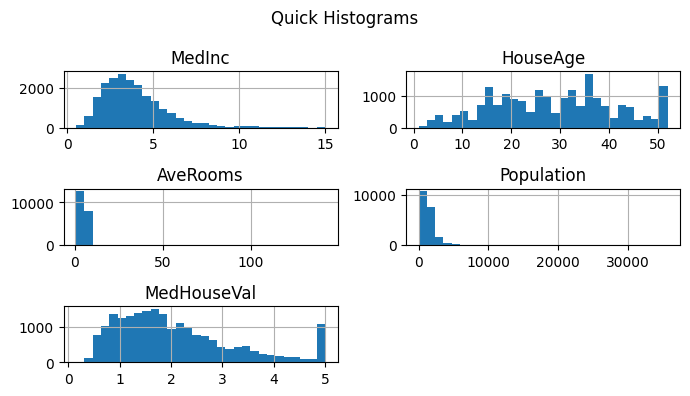

In [6]:

cols = ["MedInc", "HouseAge", "AveRooms", "Population", "MedHouseVal"]
df[cols].hist(bins=30)
plt.suptitle("Quick Histograms")
plt.tight_layout()
plt.show()


**Annotation:**

This code block is designed to visualize the distribution of several key numerical features in your DataFrame `df` using histograms. Here's a breakdown:

*   `cols = ["MedInc", "HouseAge", "AveRooms", "Population", "MedHouseVal"]`: This line defines a Python list named `cols` containing the names of the columns from your DataFrame `df` that you want to visualize. These are 'Median Income', 'House Age', 'Average Rooms', 'Population', and 'Median House Value'.
*   `df[cols].hist(bins=30)`: This is the core plotting command. It first selects only the columns specified in the `cols` list from the `df` DataFrame. Then, it calls the `.hist()` method on this subset. This method automatically generates a histogram for each selected column. The `bins=30` argument specifies that each histogram should divide its data range into 30 intervals, or 'bins', to count data points falling into each one.
*   `plt.suptitle("Quick Histograms")`: After generating the individual histograms, this line adds a main title, "Quick Histograms", to the entire figure that contains all the subplots.
*   `plt.tight_layout()`: This command automatically adjusts subplot parameters for a tight layout, preventing labels and titles from overlapping.
*   `plt.show()`: Finally, this line displays the generated figure with all the histograms. Without `plt.show()`, the plot might not be rendered, or it might be rendered implicitly depending on the environment, but it's good practice to call it explicitly.


### Your Turn (A)
1. Pick one column and compute its **mean**, **median**, and **standard deviation**.
2. Which column looks the most skewed (not symmetric)? Why?


## Step 6 — Selecting Columns and Rows

In [7]:

medinc = df["MedInc"]
print("Series type:", type(medinc), "shape:", medinc.shape)

subset = df[["MedInc", "HouseAge", "MedHouseVal"]]
subset.head()


Series type: <class 'pandas.core.series.Series'> shape: (20640,)


,MedInc,HouseAge,MedHouseVal
0,8.3252,41.0,4.526
1,8.3014,21.0,3.585
2,7.2574,52.0,3.521
3,5.6431,52.0,3.413
4,3.8462,52.0,3.422


## Step 7 — Filtering Rows (Boolean Masks)

In [8]:

high_income = df[df["MedInc"] > 5]
print("High income rows:", len(high_income))
high_income.head()


High income rows: 4489


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
61,6.1183,49.0,5.869565,1.260870,86.0,3.739130,37.82,-122.29,0.750


## Step 8 — Sorting

In [9]:

df.sort_values("MedHouseVal", ascending=False).head(10)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5253,13.2935,27.0,7.607143,1.012673,2336.0,2.691244,34.11,-118.49,5.00001
5254,10.7937,29.0,7.471787,1.217868,1500.0,2.351097,34.07,-118.48,5.00001
5255,8.5153,40.0,6.407266,0.925430,1564.0,2.990440,34.07,-118.48,5.00001
5256,12.8665,37.0,7.457565,1.012915,1318.0,2.431734,34.07,-118.48,5.00001
5257,15.0001,42.0,9.229032,1.161290,829.0,2.674194,34.06,-118.49,5.00001
5258,13.5728,36.0,8.321023,1.039773,1054.0,2.994318,34.07,-118.49,5.00001
5259,13.9470,29.0,8.494816,1.052780,2919.0,2.751178,34.11,-118.51,5.00001
5260,15.0000,39.0,9.293750,1.018750,414.0,2.587500,34.05,-118.50,5.00001
5261,8.1888,37.0,7.235139,1.100396,1925.0,2.542933,34.09,-118.53,5.00001
5262,4.8250,45.0,5.832797,1.045016,709.0,2.279743,34.05,-118.52,5.00001


## Step 9 — Groupby (Split-Apply-Combine)

We create age bins and compare average target value per bin.

In [ ]:

df2 = df.copy()
df2["AgeBin"] = pd.cut(df2["HouseAge"], bins=[0, 10, 20, 30, 40, 60], include_lowest=True)

grouped = df2.groupby("AgeBin")["MedHouseVal"].agg(["count", "mean", "median"])
grouped



### Your Turn (B)
1. Create a bin for `MedInc` (e.g., low/medium/high) and compare `MedHouseVal` mean.
2. What does `count` tell you?


---
# Part B — NumPy Essentials for ML Code

## Step 10 — From Pandas to NumPy (ndarray)

In [13]:

X_df = df.drop(columns=["MedHouseVal"])
y_s = df["MedHouseVal"]

X = X_df.to_numpy()
y = y_s.to_numpy()

print("X shape:", X.shape, "type:", type(X))
print("y shape:", y.shape, "type:", type(y))


X shape: (20640, 8) type: <class 'numpy.ndarray'>
y shape: (20640,) type: <class 'numpy.ndarray'>


## Step 11 — Vectorized Computations (No Python loops)

In [12]:

x = df["MedInc"].to_numpy()

x_mean = x.mean()
x_std = x.std()
z = (x - x_mean) / x_std

print("First 5 z-scores:", z[:5])
print("Check mean≈0, std≈1:", round(z.mean(), 4), round(z.std(), 4))


First 5 z-scores: [ 2.34476576  2.33223796  1.7826994   0.93296751 -0.012881  ]
Check mean≈0, std≈1: 0.0 1.0


## Step 12 — Broadcasting (Common in ML)

In [14]:

col_means = X.mean(axis=0)      # shape (n_features,)
X_centered = X - col_means      # broadcasting

print("Means after centering (should be near 0):")
print(np.round(X_centered.mean(axis=0), 6))


Means after centering (should be near 0):
[ 0. -0.  0. -0. -0.  0. -0. -0.]


## Step 13 — Masking (Filtering with conditions)

In [15]:

pop = df["Population"].to_numpy()
threshold = np.quantile(pop, 0.99)
mask = pop >= threshold

print("Top 1% population threshold:", threshold)
print("Rows in top 1%:", mask.sum())

df.loc[mask, ["Population", "MedInc", "MedHouseVal"]].head()


Top 1% population threshold: 5805.830000000002
Rows in top 1%: 207


,Population,MedInc,MedHouseVal
570,7427.0,7.6110,3.507
864,8117.0,5.8322,2.818
865,8012.0,5.6277,2.698
869,6075.0,6.1047,2.782
871,7205.0,6.0824,2.735


## Step 14 — Reshaping (Why ML expects 2D feature arrays)

In [ ]:

x1d = df["MedInc"].to_numpy()
print("1D shape:", x1d.shape)

x2d = x1d.reshape(-1, 1)
print("2D shape:", x2d.shape)


**Annotation:**

This code snippet demonstrates how to convert a Pandas Series into a NumPy array and then reshape it, which is a fundamental operation in preparing data for many machine learning models. Let's break it down:

*   `x1d = df["MedInc"].to_numpy()`: This line first selects the 'MedInc' (Median Income) column from your DataFrame `df`. This selection results in a Pandas Series. The `.to_numpy()` method then converts this Pandas Series into a 1-dimensional NumPy array. The output `1D shape: (20640,)` confirms it's a 1-dimensional array with 20,640 elements.
*   `print("1D shape:", x1d.shape)`: This simply prints the shape of the `x1d` array, which will be a tuple indicating its dimensions.
*   `x2d = x1d.reshape(-1, 1)`: This is the crucial reshaping step. The `.reshape()` method is used to change the dimensions of a NumPy array. Here:
    *   `-1` tells NumPy to automatically calculate the size of that dimension based on the original array's length and the other specified dimensions. In this case, it will be 20,640.
    *   `1` specifies that the array should have 1 column.
    *   The result is that the 1-dimensional array `x1d` of shape `(20640,)` is transformed into a 2-dimensional array `x2d` of shape `(20640, 1)`. This means it now has 20,640 rows and 1 column.
*   `print("2D shape:", x2d.shape)`: This prints the new shape of the `x2d` array, confirming it is now 2-dimensional.

This reshaping to `(-1, 1)` is very common because many machine learning libraries, especially Scikit-learn, expect feature arrays (`X`) to be 2-dimensional, even if you only have a single feature. They expect the shape to be `(n_samples, n_features)`, where `n_samples` is the number of data points and `n_features` is the number of features. When you have only one feature, it's reshaped to explicitly have one column.


### Your Turn (C)
1. Create a NumPy array of shape (5, 3) with random numbers.
2. Compute the mean of each column.
3. Subtract the column means from the array using broadcasting.


---
# Part C — Cleaning Data (Missing Values + Types)

## Step 15 — Create a Small Messy Dataset (Practice)

In [ ]:

messy = pd.DataFrame({
    "age": [19, 22, None, 35, 28],
    "income": ["45000", "52000", "not available", "61000", None],
    "city": ["A", "B", "A", "C", "B"]
})
messy


## Step 16 — Fix Types + Missing Values

In [ ]:

clean = messy.copy()

clean["income"] = pd.to_numeric(clean["income"], errors="coerce")

clean["age"] = clean["age"].fillna(clean["age"].median())
clean["income"] = clean["income"].fillna(clean["income"].median())

clean


## Step 17 — One-Hot Encoding (Core idea used in ML pipelines)

In [ ]:

encoded = pd.get_dummies(clean, columns=["city"], drop_first=False)
encoded



### Your Turn (D)
1. Change `drop_first=True` and explain what changes.
2. Why might some ML models prefer `drop_first=True`?


---
# Part D — Mini “Data Prep” Pipeline

## Step 18 — Train/Test Split (Preparing for Modeling)

In [ ]:

from sklearn.model_selection import train_test_split

X_df = df.drop(columns=["MedHouseVal"])
y_s = df["MedHouseVal"]

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X_df, y_s, test_size=0.2, random_state=42
)

print("Train shape:", X_train_df.shape, "Test shape:", X_test_df.shape)


## Step 19 — Simple Feature Scaling with NumPy

In [ ]:

X_train = X_train_df.to_numpy()
X_test = X_test_df.to_numpy()

mu = X_train.mean(axis=0)
sigma = X_train.std(axis=0)

X_train_scaled = (X_train - mu) / sigma
X_test_scaled = (X_test - mu) / sigma

print("Train scaled means (≈0):", np.round(X_train_scaled.mean(axis=0), 3))
print("Train scaled stds  (≈1):", np.round(X_train_scaled.std(axis=0), 3))



### Why “training stats only”?
If you use test-set information (even means/stds) while training, you leak information and get overly optimistic results.


---
# Review Questions (with answers at the end)


## Review Questions

1. What’s the difference between a **DataFrame** and a **NumPy ndarray**?
2. What does `df.describe()` help you understand quickly?
3. Why do we check for missing values before modeling?
4. What is a **boolean mask**, and how is it used?
5. Explain **broadcasting** in one sentence.
6. Why do scikit-learn models usually expect `X` to be 2D?
7. What is one-hot encoding, and why do we need it?
8. Why must feature scaling be fit on the **training** set only?
9. In a histogram, what does “skew” mean?
10. What does `groupby` do conceptually?
11. How would you select rows where `MedInc` is between 3 and 4?
12. How would you compute the correlation between `MedInc` and `MedHouseVal` in Pandas?



# Answer Key

1. DataFrame: labeled table; ndarray: numeric array without labels (fast math).
2. It summarizes count/mean/std/min/percentiles/max for numeric columns.
3. Missing values can break models or distort results; you must drop or impute.
4. A True/False array used to filter rows: `df[mask]`.
5. Broadcasting auto-expands shapes so vectorized math works without loops.
6. Features are columns; expected shape is (n_samples, n_features).
7. Convert categories into numeric indicator columns so ML models can use them.
8. Using test stats leaks info and inflates performance.
9. Skew means a long tail on one side (not symmetric).
10. Split data into groups, compute per-group stats, combine results.
11. `df[(df["MedInc"] >= 3) & (df["MedInc"] <= 4)]`
12. `df["MedInc"].corr(df["MedHouseVal"])`
